In [1]:
# Simpli5ed Dynamics of Human and Mammalian Neocortical Neurons
# Surabhi S Nath
# 2016271

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
from brian2 import *
import brian2
from IPython.display import Image
from scipy.optimize import *

# Fig 1

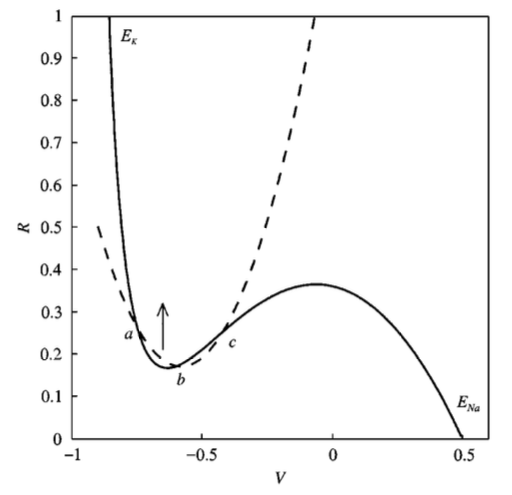

In [3]:
Image(filename="img/5.png")

In [4]:
C = 1

g_K = 26

E_Na = 0.5
E_K = -0.95

tau = 2

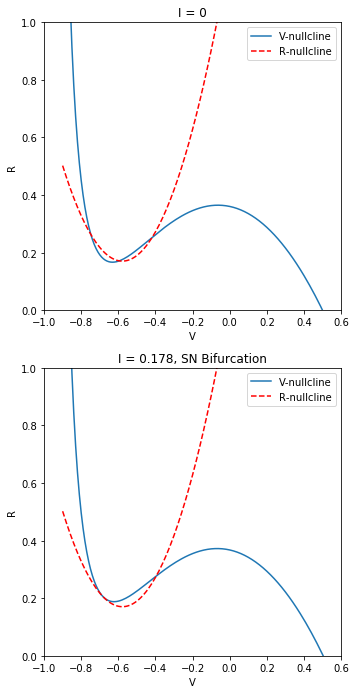

In [5]:
# Clearly R-nullcline is quadratic and not S-shaped sigmoidal
I = [0, 0.178]
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'right': 0.95, 'bottom': 0.00001}, figsize=(5, 10))

V = np.arange(-0.9, 1, 0.01)
ax1.plot(V, (0 - (17.8 + 47.6 * V + 33.8 * V * V) * (V - E_Na))/(g_K * (V - E_K)), label="V-nullcline")
ax1.plot(V, 1.24 + 3.7 * V + 3.2 * V * V, 'r--', label="R-nullcline")
ax1.set(xlim=(-1, 0.6), ylim=(0, 1), xlabel='V')
ax1.set_ylabel('R', rotation=90)
ax1.set_title("I = 0")
ax1.legend()

ax2.plot(V, (0.178 - (17.8 + 47.6 * V + 33.8 * V * V) * (V - E_Na))/(g_K * (V - E_K)), label="V-nullcline")
ax2.plot(V, 1.24 + 3.7 * V + 3.2 * V * V, 'r--', label="R-nullcline")
ax2.set(xlim=(-1, 0.6), ylim=(0, 1), xlabel='V')
ax2.set_ylabel('R', rotation=90)
ax2.set_title("I = 0.178, SN Bifurcation")
ax2.legend()

plt.show()

# Regular Spiking and Fast Spiking Neurons

# Fig 2b

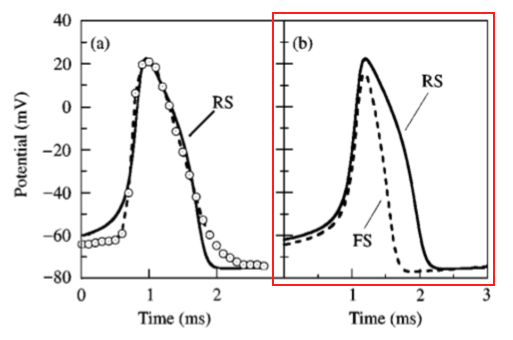

In [6]:
Image(filename="img/6.png")

In [7]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *

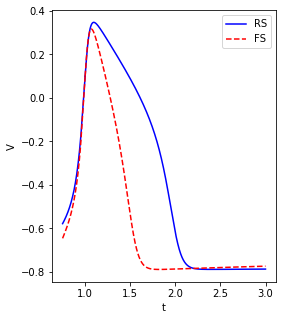

In [8]:
def dz_dt(z, t, I, tau, a, b):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (I - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - a * z[2] * (z[0] - 1.2) - b * z[3] * (z[0] + 0.95)) / 1 
    dR_dt = (R_inf - z[1]) / tau
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    return [dV_dt, dR_dt, dT_dt, dH_dt]

plt.figure(figsize=(4,5))
t = np.linspace(1, 3, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(0, 4.2, 0.1, 5))
V = ret[:, 0]
plt.plot(t, V, color='b', label="RS")

t = np.linspace(1, 0.75, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(0, 4.2, 0.1, 5))
V = ret[:, 0]
plt.plot(t, V, color='b')

t = np.linspace(1, 3, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(0, 1.5, 0.25, 0))
V = ret[:, 0]
plt.plot(t, V, 'r--', label="FS")

t = np.linspace(1, 0.75, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(0, 1.5,  0.25, 0))
V = ret[:, 0]
plt.plot(t, V, 'r--')

plt.xlabel("t")
plt.ylabel("V")
plt.legend()

# Fig 2c

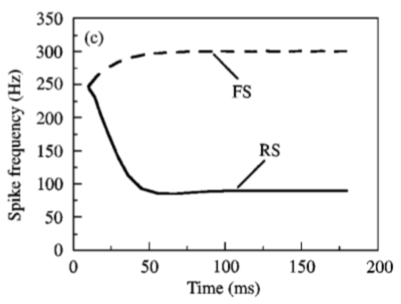

In [9]:
Image(filename="img/7.png")

In [10]:
def find_spikes(arr):
    peaks = np.where((arr[1:-1] > arr[0:-2]) * (arr[1:-1] > arr[2:]))[0] + 1
    return peaks

In [11]:
def find_reciprocal_differences(arr):
    diffs = [x - arr[i - 1] for i, x in enumerate(arr)][1:]
    diffs = np.array(diffs, dtype=float)
    return np.reciprocal(diffs) * 1000

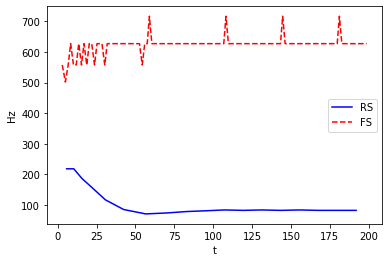

In [12]:
def dz_dt(z, t, I, tau, a, b):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (I - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - a * z[2] * (z[0] - 1.2) - b * z[3] * (z[0] + 0.95)) / 1 
    dR_dt = (R_inf - z[1]) / tau
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    return [dV_dt, dR_dt, dT_dt, dH_dt]

# plt.figure(figsize=(10,5))
t = np.linspace(1, 200, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(2.1, 4.2, 0.1, 5))
V = ret[:, 0]
spikes1 = find_spikes(V)
rec_diff1 = find_reciprocal_differences(t[spikes1])
times1 = t[spikes1]
times1 = times1[1:]
# plt.plot(t, V, 'b', label="RS")
# plt.scatter([t[spikes1]], [V[spikes1]])

t = np.linspace(1, 0.75, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(2.1, 4.2, 0.1, 5))
V = ret[:, 0]
# plt.plot(t, V, 'b')
# plt.xlabel("t")
# plt.ylabel("V")

#---------------------------

# plt.figure(figsize=(10,5))
t = np.linspace(1, 200, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(2.1, 1.5, 0.25, 0)) # confusion with 1.5, 0.1, 5 and 4.2, 0.1, 5 and 4.2, 0.25, 0
V = ret[:, 0]
spikes2 = find_spikes(V)
rec_diff2 = find_reciprocal_differences(t[spikes2])
times2 = t[spikes2]
times2 = times2[1:]
# plt.plot(t, V, 'r', label="FS")
# plt.scatter([t[spikes2]], [V[spikes2]])

t = np.linspace(1, 0.75, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(2.1, 1.5, 0.25, 0))
V = ret[:, 0]
# plt.plot(t, V, 'r')
# plt.xlabel("t")
# plt.ylabel("V")

#--------------------------

plt.figure()
minlen = min(len(times1), len(times2))
plt.plot(times1, rec_diff1, 'b', label="RS")
plt.plot(times2, rec_diff2, 'r--', label="FS")
plt.xlabel("t")
plt.ylabel("Hz")
plt.legend()

# Fig 3

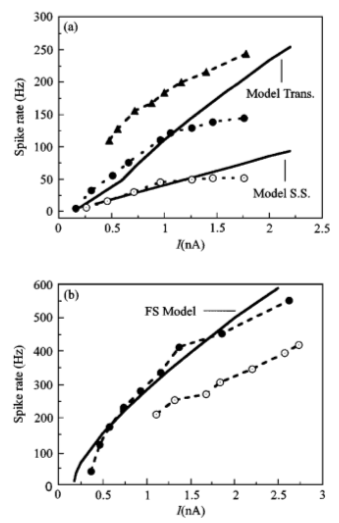

In [13]:
Image(filename="img/8.png")

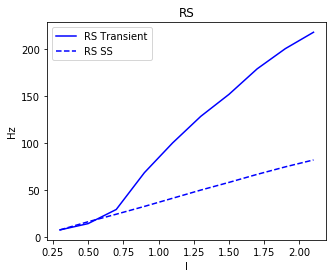

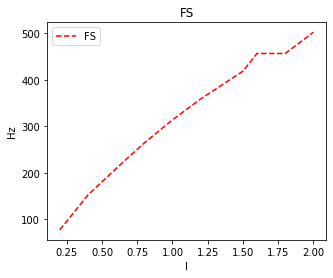

In [14]:
def dz_dt(z, t, I, tau, a, b):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (I - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - a * z[2] * (z[0] - 1.2) - b * z[3] * (z[0] + 0.95)) / 1 
    dR_dt = (R_inf - z[1]) / tau
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    return [dV_dt, dR_dt, dT_dt, dH_dt]

xx = [i.round(1) for i in arange(0.3, 2.2, 0.2)]
yy1init = []
yy1ss = []

for i in arange(0.3, 2.2, 0.2):
    i = i.round(1)
    t = np.linspace(1, 200, 1000)
    ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(i, 4.2, 0.1, 5))
    V = ret[:, 0]
    spikes = find_spikes(V)
    rec_diff = find_reciprocal_differences(t[spikes])
    initfreq = rec_diff[0]
    yy1init.append(initfreq)
    ssfreq = rec_diff[-1]
    yy1ss.append(ssfreq)

plt.figure(figsize=(5,4))
plt.plot(xx, yy1init, 'b', label="RS Transient")
plt.plot(xx, yy1ss, 'b--', label="RS SS")
plt.legend()
plt.xlabel("I")
plt.ylabel("Hz")
plt.title("RS")
plt.show()
#---------------------------

xx = [i.round(1) for i in arange(0.25, 2.2, 0.2)]
yy2 = []

for i in arange(0.25, 2.2, 0.2):
    i = i.round(1)
    t = np.linspace(1, 200, 1000)
    ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t, args=(i, 1.5, 0.25, 0))
    V = ret[:, 0]
    spikes = find_spikes(V)
    rec_diff = find_reciprocal_differences(t[spikes])
    freq = rec_diff[0]
    yy2.append(freq)

plt.figure(figsize=(5,4))
plt.plot(xx, yy2, 'r--', label="FS")
plt.legend()
plt.xlabel("I")
plt.ylabel("Hz")
plt.title("FS")
plt.show()

# Continuous and Intrinsic Bursting Neurons

# Fig 4

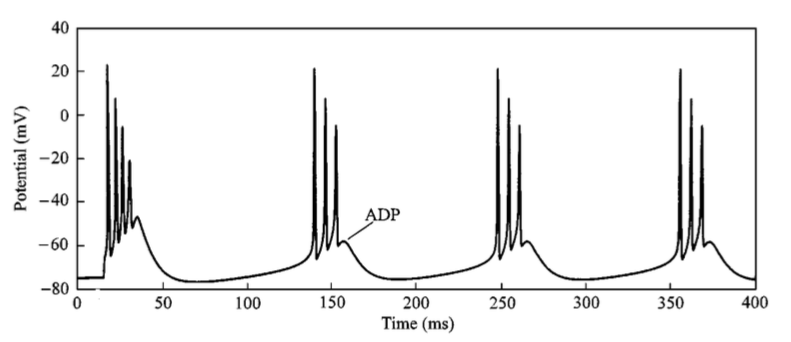

In [15]:
Image(filename="img/9.png")

Text(0, 0.5, 'V')

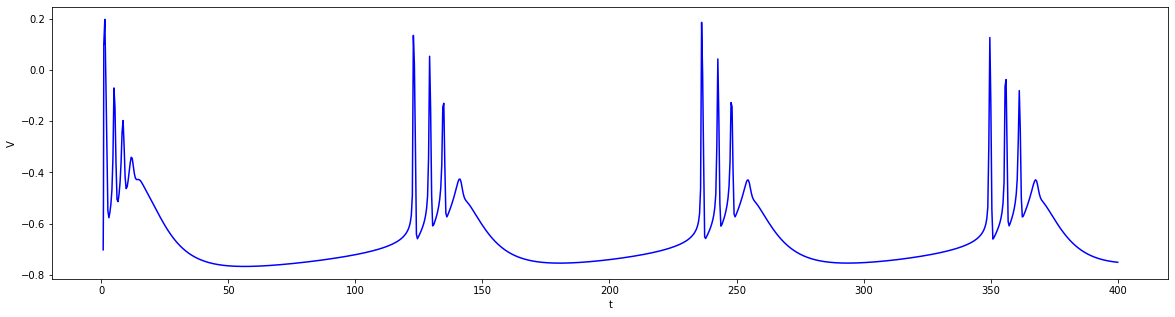

In [16]:
def dz_dt(z, t):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (0.85 - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - 2.25 * z[2] * (z[0] - 1.2) - 9.5 * z[3] * (z[0] + 0.95)) / 1 
    dR_dt = (R_inf - z[1]) / 4.2
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    return [dV_dt, dR_dt, dT_dt, dH_dt]

plt.figure(figsize=(20,5))
t = np.linspace(1, 400, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]
plt.plot(t, V, color='b')

t = np.linspace(1, 0.75, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]
plt.plot(t, V, color='b')

plt.xlabel("t")
plt.ylabel("V")

# Fig 5

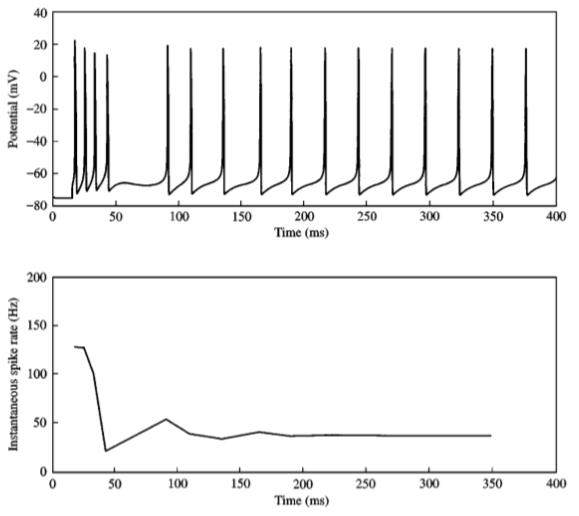

In [17]:
Image(filename="img/10.png")

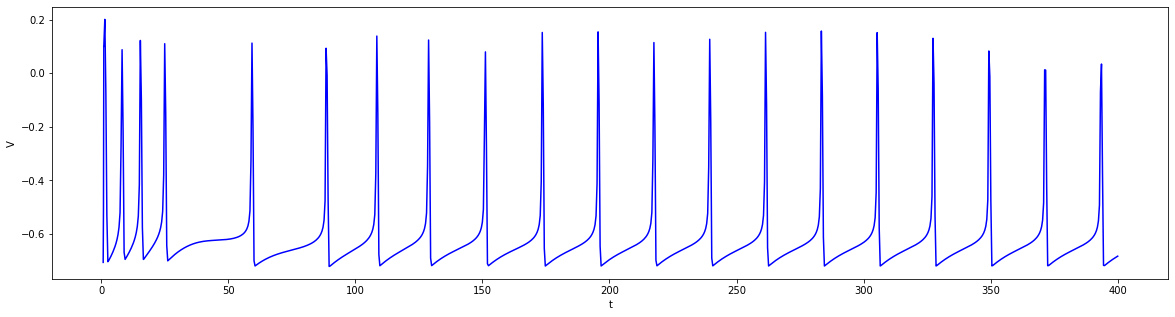

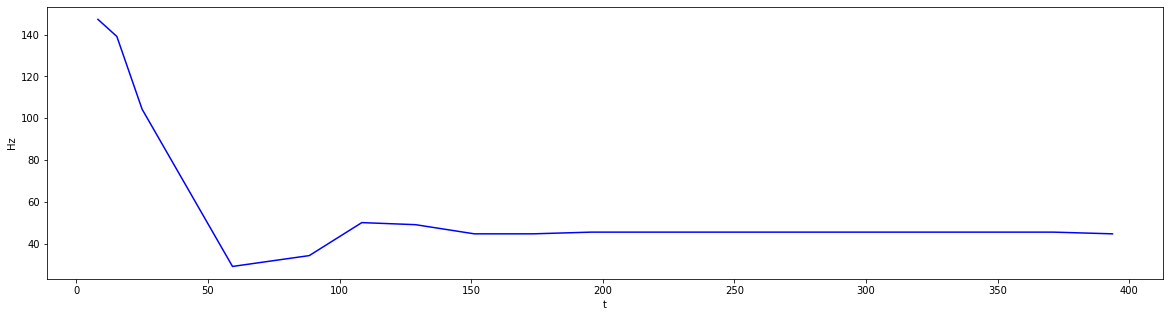

In [18]:
def dz_dt(z, t):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (0.85 - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - 0.8 * z[2] * (z[0] - 1.2) - 4 * z[3] * (z[0] + 0.95)) / 1 
    dR_dt = (R_inf - z[1]) / 4.2
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    return [dV_dt, dR_dt, dT_dt, dH_dt]

plt.figure(figsize=(20,5))
t = np.linspace(1, 400, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]
plt.plot(t, V, color='b')

spikes = find_spikes(V)
rec_diff = find_reciprocal_differences(t[spikes])
times = t[spikes]
times = times[1:]

t = np.linspace(1, 0.75, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]

plt.plot(t, V, color='b')
plt.xlabel("t")
plt.ylabel("V")

#-----------------------------------
plt.figure(figsize=(20,5))
plt.plot(times, rec_diff, 'b')
plt.xlabel("t")
plt.ylabel("Hz")
plt.show()

# Fig 6

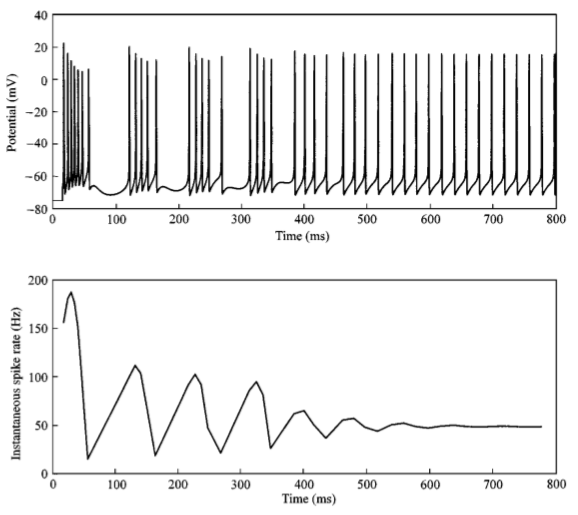

In [19]:
Image(filename="img/11.png")

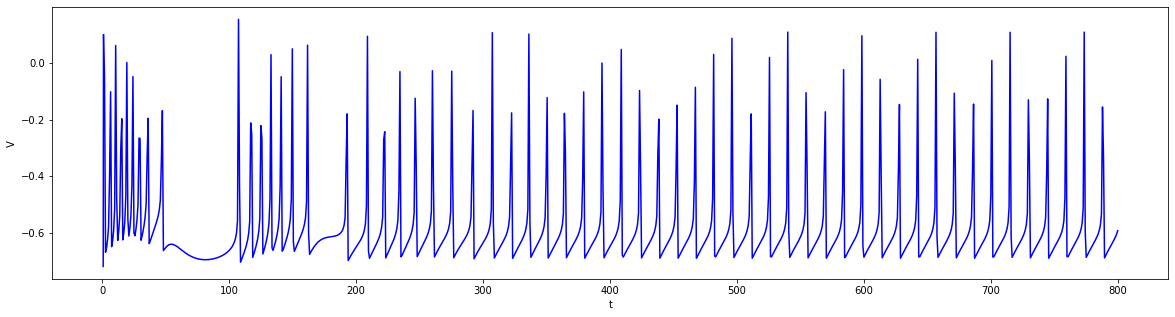

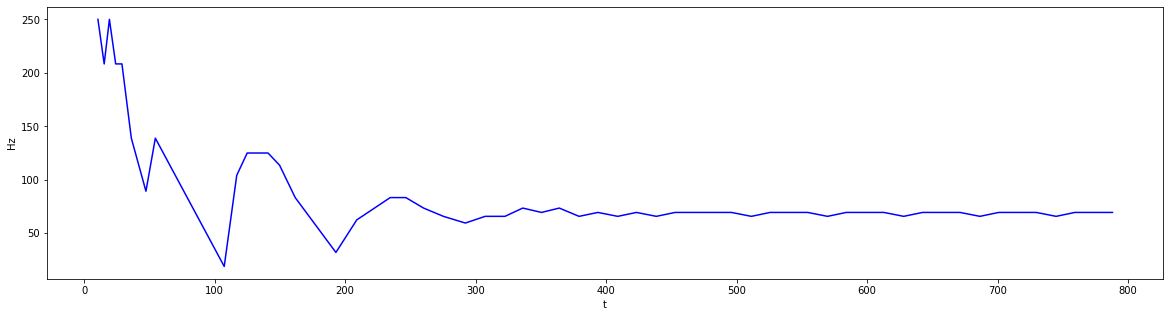

In [20]:
def dz_dt(z, t):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (0.85 - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - 1.2 * z[2] * (z[0] - 1.2) - 3.4 * z[3] * (z[0] + 0.95)) / 1 
    dR_dt = (R_inf - z[1]) / 4.2
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    return [dV_dt, dR_dt, dT_dt, dH_dt]

plt.figure(figsize=(20,5))
t = np.linspace(1, 800, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]
plt.plot(t, V, color='b')

spikes = find_spikes(V)
rec_diff = find_reciprocal_differences(t[spikes])
times = t[spikes]
times = times[1:]

t = np.linspace(1, 0.75, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]

plt.plot(t, V, color='b')
plt.xlabel("t")
plt.ylabel("V")

#-----------------------------------

plt.figure(figsize=(20,5))
plt.plot(times, rec_diff, 'b')
plt.xlabel("t")
plt.ylabel("Hz")
plt.show()

# Synaptic Connections

# Fig 7

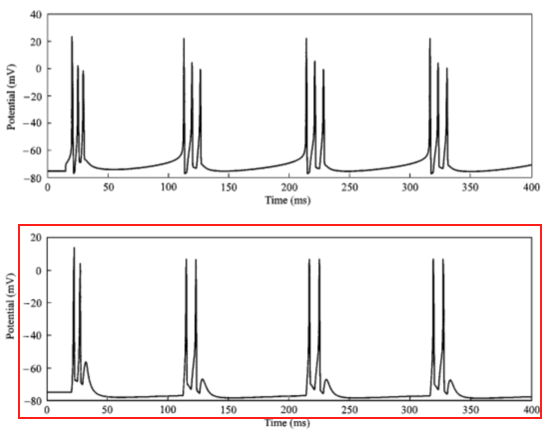

In [21]:
Image(filename="img/12.png")

Text(0, 0.5, 'V')

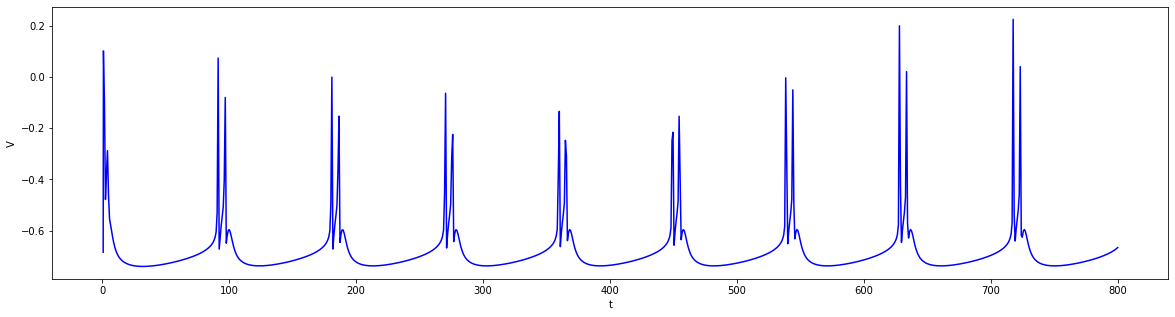

In [22]:
# Reciprocally excitatory RS neurons
def dz_dt(z, t):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (0.5 - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - 0.1 * z[2] * (z[0] - 1.2) - 5 * z[3] * (z[0] + 0.95) - 20 * z[5] * (z[0] - 0)) / 1 
    dR_dt = (R_inf - z[1]) / 4.2
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    if z[0] - (-0.1) > 0:
        H = 1
    else:
        H = 0
    df_dt = (H - z[4]) / 2
    dS_dt = (z[4] - z[5]) / 2
    return [dV_dt, dR_dt, dT_dt, dH_dt, df_dt, dS_dt]


plt.figure(figsize=(20,5))
t = np.linspace(1, 800, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]
plt.plot(t, V, color='b')

t = np.linspace(1, 0.8, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]

plt.plot(t, V, color='b')
plt.xlabel("t")
plt.ylabel("V")

# Fig 8

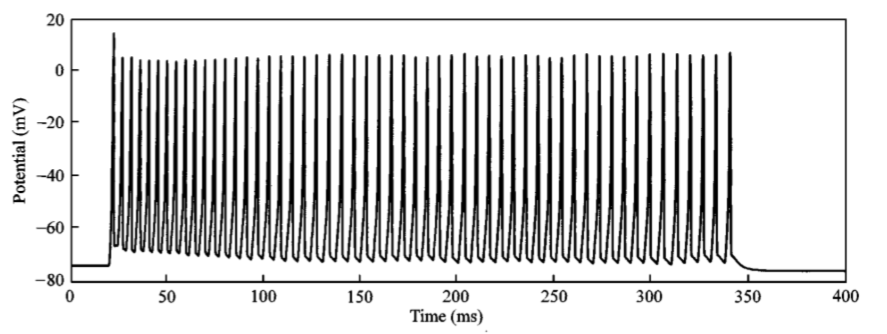

In [23]:
Image(filename="img/13.png")

Text(0, 0.5, 'V')

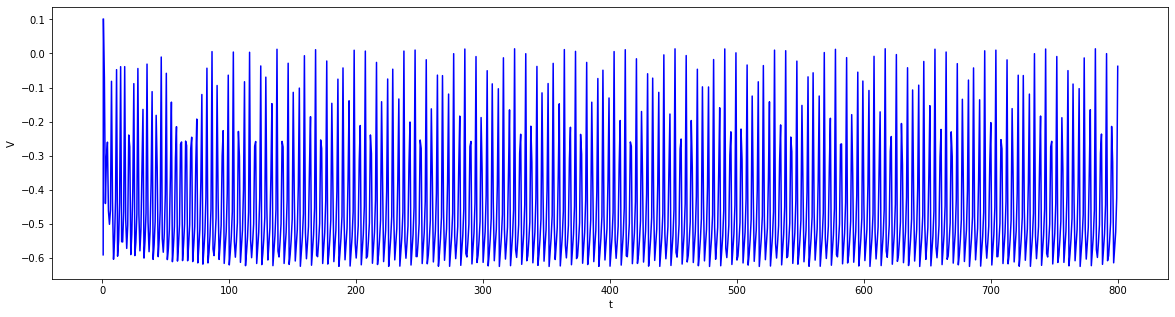

In [24]:
# Reciprocally excitatory RS neurons with attenuated g_H resulting from stimulated neuromodulation
def dz_dt(z, t):
    m_inf = 17.8 + 47.6 * z[0] + 33.8 * z[0] * z[0]
    R_inf = 1.24 + 3.7 * z[0] + 3.2 * z[0] * z[0]
    T_inf = 8 * (z[0] + 0.725) * (z[0] + 0.725)
    dV_dt = (0.5 - m_inf * (z[0] - 0.5) - 26 * z[1] * (z[0] + 0.95) - 0.1 * z[2] * (z[0] - 1.2) - 0.4 * z[3] * (z[0] + 0.95) - 20 * z[5] * (z[0] - 0)) / 1 
    dR_dt = (R_inf - z[1]) / 4.2
    dT_dt = (T_inf - z[2]) / 14
    dH_dt = (3 * z[2] - z[3]) / 45
    if z[0] - (-0.1) > 0:
        H = 1
    else:
        H = 0
    df_dt = (H - z[4]) / 2
    dS_dt = (z[4] - z[5]) / 2
    return [dV_dt, dR_dt, dT_dt, dH_dt, df_dt, dS_dt]


plt.figure(figsize=(20,5))
t = np.linspace(1, 800, 1000)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]
plt.plot(t, V, color='b')

t = np.linspace(1, 0.85, 500)
ret = odeint(dz_dt, [0.1, 0.1, 0.1, 0.1, 0.1, 0.1], t)
V = ret[:, 0]

plt.plot(t, V, color='b')
plt.xlabel("t")
plt.ylabel("V")

# Critical Points, Jacobian

In [25]:
V, R, T, H, g_H, g_T, tau_R, I  = symbols('V, R, T, H, g_H, g_T, tau_R, I')

In [26]:
Vdot = (I - (17.8 + 47.6 * V + 33.8 * V * V) * (V - 0.5) - 26 * (1.24 + 3.7 * V + 3.2 * V * V) * (V + 0.95) - g_T * (8 * (V + 0.725) * (V + 0.725)) * (V - 1.2) - g_H * (3 * (8 * (V + 0.725) * (V + 0.725))) * (V + 0.95)) / 1
Vnull = Eq(Vdot, 0)
print("I =", end=" ")
I1 = solve(Vnull, I)[0]
solve(Vnull, I)[0]

I = 

In [27]:
# TTX Condition where m_inf = 1.1125
Vdot = (I - 1.1125 * (V - 0.5) - 26 * (1.24 + 3.7 * V + 3.2 * V * V) * (V + 0.95) - g_T * (8 * (V + 0.725) * (V + 0.725)) * (V - 1.2) - g_H * (3 * (8 * (V + 0.725) * (V + 0.725))) * (V + 0.95)) / 1
Vnull = Eq(Vdot, 0)
print("I =", end=" ")
I2 = solve(Vnull, I)[0]
solve(Vnull, I)[0]

I = 

In [28]:
m_inf = 17.8 + 47.6 * V + 33.8 * V * V
R_inf = 1.24 + 3.7 * V + 3.2 * V * V
T_inf = 8 * (V + 0.725) * (V + 0.725)
dV_dt1 = (I1 - m_inf * (V - 0.5) - 26 * R * (V + 0.95) - g_T * T * (V - 1.2) - g_H * H * (V + 0.95)) / 1 
dV_dt2 = (I2 - 1.1125 * (V - 0.5) - 26 * R * (V + 0.95) - g_T * T * (V - 1.2) - g_H * H * (V + 0.95)) / 1
# dV_dtconst1 = (I1 - (17.8 + 47.6 * V + 33.8 * V * V) * (V - 0.5) - 26 * (1.24 + 3.7 * V + 3.2 * V * V) * (V + 0.95) - g_T * (8 * (V + 0.725) * (V + 0.725)) * (V - 1.2) - g_H * (3 * (8 * (V + 0.725) * (V + 0.725))) * (V + 0.95)) / 1
# dV_dtconst2 = (I2 - 1.1125 * (V - 0.5) - 26 * (1.24 + 3.7 * V + 3.2 * V * V) * (V + 0.95) - g_T * (8 * (V + 0.725) * (V + 0.725)) * (V - 1.2) - g_H * (3 * (8 * (V + 0.725) * (V + 0.725))) * (V + 0.95)) / 1
dR_dt = (R_inf - R) / tau_R
dT_dt = (T_inf - T) / 14
dH_dt = (3 * T - H) / 45

a11 = diff(dV_dt1, V)
a12 = diff(dV_dt2, V)
b11 = diff(dV_dt1, R)
b12 = diff(dV_dt2, R)
c11 = diff(dV_dt1, T)
c12 = diff(dV_dt2, T)
d11 = diff(dV_dt1, H)
d12 = diff(dV_dt2, H)

a2 = diff(dR_dt, V)
b2 = diff(dR_dt, R)
c2 = diff(dR_dt, T)
d2 = diff(dR_dt, H)

a3 = diff(dT_dt, V)
b3 = diff(dT_dt, R)
c3 = diff(dT_dt, T)
d3 = diff(dT_dt, H)

a4 = diff(dH_dt, V)
b4 = diff(dH_dt, R)
c4 = diff(dH_dt, T)
d4 = diff(dH_dt, H)

In [29]:
jacobian1 = Matrix([[a11, b11, c11, d11], [a2, b2, c2, d2], [a3, b3, c3, d3], [a4, b4, c4, d4]])
jacobian2 = Matrix([[a12, b12, c12, d12], [a2, b2, c2, d2], [a3, b3, c3, d3], [a4, b4, c4, d4]])

In [30]:
jacobian1

⎡                               2                                             
⎢-H⋅g_H - 26⋅R - T⋅g_T + 317.2⋅V  + 0.015⋅V⋅g_H⋅(3200.0⋅V + 2320.0) + 0.005⋅V⋅
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                   

In [31]:
jacobian2

⎡                               2                                             
⎢-H⋅g_H - 26⋅R - T⋅g_T + 249.6⋅V  + 0.015⋅V⋅g_H⋅(3200.0⋅V + 2320.0) + 0.005⋅V⋅
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                   

# 2D Model

In [32]:
Vdot = (I - (17.8 + 47.6 * V + 33.8 * V * V) * (V - 0.5) - 26 * R * (V + 0.95)) / 1 
Rdot = ((1.24 + 3.7 * V + 3.2 * V * V) - R) / 4.2

In [33]:
a = diff(Vdot, V)
aa = lambdify((V,R), a)
b = diff(Vdot, R)
bb = lambdify((V,R), b)
c = diff(Rdot, V)
cc = lambdify((V,R), c)
d = diff(Rdot, R)
dd = lambdify((V,R), d)

In [34]:
#http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html
def eigenvalues(x,y):
    a11 = aa(x,y) # differentiated with respect to x
    a12 = bb(x,y) # differentiated with respect to y
    a21 = cc(x,y) # differentiated with respect to x
    a22 = dd(x,y) # differentiated with respect to y

    tr = a11 + a22
    det = a11*a22 - a12*a21
    
    if tr**2 >= 4*det:
        # Real
        lambda1 = (tr - sqrt(tr**2 - 4*det))/2
        lambda2 = (tr + sqrt(tr**2 - 4*det))/2

        print('Check the fixed point  %s, %s' % (x,y))
        print('The first eigenvalue is %s' % lambda1)
        print('The second eigenvalue is %s' % lambda2)
    
    else:
        lambda1 = tr/2
        lambda2 = tr/2

        print('Check the fixed point (%s, %s)' % (x,y))
        print('The real component of the first eigenvalue is %s' % lambda1)
        print('The real component of the second eigenvalue is %s' % lambda2)
        
    
    if (lambda1 < 0 and lambda2 < 0):
        print('The fixed point (%s, %s) is a sink. It is stable' % (x,y))
        return 1
    if (lambda1 > 0 and lambda2 > 0):
        print('The fixed point (%s, %s) is a source. It is unstable' % (x,y))
        return 0
    if (lambda1 > 0 and lambda2 < 0):
        print('The fixed point (%s, %s) is a saddle. It is unstable' % (x,y))
        return 0
    if (lambda1 < 0 and lambda2 > 0):
        print('The fixed point (%s, %s) is a saddle. It is unstable' % (x,y))
        return 0

In [36]:
import cmath

def func(z):
    V = z[0]
    R = z[1]
    F = empty((2))
    F[0] = (i - (17.8 + 47.6 * V + 33.8 * V * V) * (V - E_Na))/(g_K * (V - E_K)) - R
    F[1] = (1.24 + 3.7 * V + 3.2 * V * V) - R

    return F

I = [-2, -1.5, -1, -0.5, 0, 0.178, 0.3, 0.5]
for i in I:
    print("I =", i)
    d = {}
    for init in [-1.5, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.3, 0, 0.5]:
        criticalpoints = fsolve(func, [init, 0.5])
        x = int(np.round(criticalpoints[0]))
        y = np.round(criticalpoints[1], 1)
        if (x, y) not in d:
            d[(x, y)] = 0
    
    print("Number of Critical Points =", len(d))
    cnt = 1
    for item in d.keys():
        print("Critical Point", cnt, "=", item)
        cnt += 1
    print()
    for tup in d:
        xx = tup[0]
        yy = tup[1]
        stability = eigenvalues(xx, yy)
        if stability == 0:
            c = 'r'
        elif stability == 1:
            c = 'g'
        #plt.scatter(i, xx, c=c)    
    print("\n\n")
    
# plt.xlabel("Applied Current I")
# plt.ylabel("Membrane Voltage V")
# plt.show()

I = -2
Number of Critical Points = 2
Critical Point 1 = (-1, 0.5)
Critical Point 2 = (0, 0.2)

Check the fixed point  -1, 0.5
The first eigenvalue is -46.9821214740575
The second eigenvalue is -0.255973764037691
The fixed point (-1, 0.5) is a sink. It is stable
Check the fixed point (0, 0.2)
The real component of the first eigenvalue is 0.28095238095238134
The real component of the second eigenvalue is 0.28095238095238134
The fixed point (0, 0.2) is a source. It is unstable



I = -1.5
Number of Critical Points = 3
Critical Point 1 = (-1, 0.4)
Critical Point 2 = (-1, -0.6)
Critical Point 3 = (0, 0.2)

Check the fixed point  -1, 0.4
The first eigenvalue is -44.3810680107564
The second eigenvalue is -0.257027227338877
The fixed point (-1, 0.4) is a sink. It is stable
Check the fixed point  -1, -0.6
The first eigenvalue is -18.3538681407520
The second eigenvalue is -0.284227097343249
The fixed point (-1, -0.6) is a sink. It is stable
Check the fixed point (0, 0.2)
The real component of th